<a href="https://colab.research.google.com/github/DashTT/Reto-01-Chagas/blob/main/Reto_1_AndradeVillenasEscobar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/FormatoBaseProyectos/blob/main/Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Carrera de Ciencia de Datos</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático &bull; Reto 1
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>



De acuerdo a la Organización Panamericana de la Salud (OPS), el mal de Chagas es una "afección parasitaria, sistémica, crónica, transmitida por vectores y causada por el protozoario Trypanosoma cruzi, con una firme vinculación con aspectos socioeconómico-culturales deficitarios, considerándosela una enfermedad desatendida."; los agentes  que propagan este parásito son las chinches de Subfamilia Triatominae.

En este documento se busca utilizar información sobre las viviendas de Loja del año 2005 para encontrar en estos datos posibles perfiles de viviendas en riesgo de vivir y exponerse a esta enfermedad.

Sabiedo esto, para seleccionar los datos podemos tener varias consideraciones que justamente la Organización Panamericana de Salud da a las personas para evitar el contagio como por ejemplo animales portadores de estas chinches, formas de transmisión y prevención, entre otros. Con ello se trabajará para la selección, análisis y conclusiones del trabajo a realizar en este documento. Dado que es un jupyter notebook, este solo busca dar el código utilizado en la investigación para su replicación y validación.

---
## <font color='264CC7'> Carga de Librerías </font>

Los paquetes necesarios son:

In [20]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

---
## <font color='264CC7'> Lectura de datos </font>


Primero, empezamos con la carga de los datos.

In [2]:
# Cargar datos
df = pd.read_csv("https://github.com/DashTT/Reto-01-Chagas/blob/main/Conjunto%20de%20datos%20Viviendas_Loja_2005-20251215/Viviendas_Loja_2005.csv?raw=true")
display(df.head())
print(f"Filas: {df.shape[0]} Columnas {df.shape[1]}")
print(df['Status entomologico'].unique())


,Código,Status entomologico,Estado,Localidad,Altitud,Longitud,Latitud,A2. Cuantos dormitorios tiene la vivienda,A3 Número de personas que duermen en la vivienda,A4. Duermen 3 o mas personas en algun dormitorio,...,J3 Cuántas,J4. Palma Africana,J4 Distancia de la casa (metros),J4 Cuántas,J5. Otro tipo de de palmera o palma,J5 Cuál,J5 Distancia de la casa (metros),J5 Cuántas,E10 Cuántos,Unnamed: 138
0,AB007,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,2.0,NaN
1,AB207,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,1.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
2,AB208,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
3,AB209,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,3.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
4,AB210,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,2.0,10.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN


Filas: 1000 Columnas 139
['Negativa' 'Positiva']


Ahora, el proceso de selección tomó varias cosas a consideración. Estas consideraciones fueron:
* Animales que pueden portar las chinches de familia Triatominae.
* Lugares idóneos donde habitan estas chinches.
* Materiales de acumulación de temperatura ideal para su forma de vida.
* Condiciones climáticas que favorecen su aparición (humedad, luminicidad, entre otros).

Renombrar variables verdadero o falso

In [3]:
# Renombrar columnas booleanas (VERDADERO / FALSO)
rename_bool_cols = {
    "A5 Escusado de uso exclusivo del hogar": "Servicio Higienico",
    "B1 Losa de hormigón": "Techo hormigon",
    "B1 Asbestos o similares": "Techo asbestos o similares",
    "B1 Zinc": "Techo zinc",
    "B1 Teja": "Techo teja",
    "B1 Paja palma o similares": "Techo palma o similares",
    "B1 Otros materiales": "Techo otros materiales",
    "B2 Hormigón ladrillo o bloque": "ParExt HormigonBloqueLadrillo",
    "B2 Adobe o tapia": "ParExt AdobeTapia",
    "B2 Madera": "ParExt Madera",
    "B2 Caña guadua revestida con papel": "ParExt GuaRevPapel",
    "B2 Caña guadua revestida o rellena de barro": "ParExt GuadRev o RellBarro",
    "B2 Caña guadua no revestida": "ParExt GuadNoRev",
    "B3 Entablado rústico": "Piso entablado rustico",
    "B3 Parquet": "Piso parquet",
    "B3 Baldosa o vinyl": "Piso baldosa",
    "B3 Ladrillo o cemento": "Piso ladrillo o cemento",
    "B3 Caña guadua": "Piso caña guadua",
    "B3 Tierra": "Piso tierra",
    "B3 Otros materiales": "Piso otros",
}

cols_interes = [entry for entry in rename_bool_cols.values()]
df = df.rename(columns=rename_bool_cols)

map_bool = {"VERDADERO": 1, "FALSO": 0}

df[cols_interes] = df[cols_interes].replace(map_bool)



/tmp/ipython-input-4034516437.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_interes] = df[cols_interes].replace(map_bool)


Recodificar las variables binarias E2, E6, E9, F1, F2

In [4]:
df["Gallinas"] = np.where(df["E2. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Cuyera: 1,2,3 = 1  /  0,4,5,6 = 0
df["Cuyera"] = np.where(df["E6. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Corral chivos/ovejas: 1,2,3 = 1  /  4,5,0 = 0
df["CorralChivosOvejas"] = np.where(df["E9. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Ratones: 1,2 = 0 (nunca / rara vez), 3,4 = 1 (frecuente / todo el tiempo)
df["Ratones"] = np.where(df["F1. Ratones"].isin([3, 4]), 1, 0).astype(int)

# Ratas: igual criterio que Ratones
df["Ratas"] = np.where(df["F2. Ratas"].isin([3, 4]), 1, 0).astype(int)

cols_interes.extend(["Gallinas", "Cuyera", "CorralChivosOvejas", "Ratones", "Ratas"])

Recodificar las variables tránsfugas

In [5]:
def recode_1_else_0(series):
    return np.where(series == 1, 1, 0).astype(int)
# H: material vegetal acumulado
df["Hojas Palma Coco"] = recode_1_else_0(df["H1. Hojas de Palma de coco"])
df["Hojas de palma cade o tagua"] = recode_1_else_0(df["H2. Hojas de Palma de Cade o tagua"])
df["Hojas de otro tipo de palmera o palma"] = recode_1_else_0(df["H3. Hojas de Palmera (Otro Tipo)"])
df["Desperdicios de cosecha"] = recode_1_else_0(df["H4. Desperdicios de la cosecha"])
df["Productos agrícolas de cosecha"] = recode_1_else_0(df["H5. Productos agricolas de la cosecha"])

# I: vegetación alrededor de la vivienda
df["Piñuelas"] = recode_1_else_0(df["I1. Piñuelas"])
df["Arbustos"] = recode_1_else_0(df["I2. Arbustos"])
df["Arboles frutales"] = recode_1_else_0(df["I3. Arboles frutales"])
df["Maleza o monte"] = recode_1_else_0(df["I4. Maleza o monte"])

# J: palmas cercanas (a 30 m)
df["Palma coco"] = recode_1_else_0(df["J2. Palmas de coco"])
df["Palma cade o tagua"] = recode_1_else_0(df["J3. Palmas de cade o tagua"])
df["Palma africana"] = recode_1_else_0(df["J4. Palma Africana"])
df["Otro tipo de de palmera o palma"] = recode_1_else_0(df["J5. Otro tipo de de palmera o palma"])

cols_interes.extend([
    "Hojas Palma Coco",
    "Hojas de palma cade o tagua",
    "Hojas de otro tipo de palmera o palma",
    "Desperdicios de cosecha",
    "Productos agrícolas de cosecha",
    "Piñuelas",
    "Arbustos",
    "Arboles frutales",
    "Maleza o monte",
    "Palma coco",
    "Palma cade o tagua",
    "Palma africana",
    "Otro tipo de de palmera o palma"
])


Selección final y limpieza para trabajo

In [14]:
df_precleaning = df[cols_interes].copy()

df_precleaning.isna().sum()

# 11 NA en todos, son coincidentes?

#(df_precleaning.isna().sum().nunique() == 1)
# Sí son. Considerando que 11/1000 = 1.1% y que todos esos NA coinciden en la entrada, vamos a considerarlo como despreciable
# Las variables binarias no tienen outliers así que

df_clean = df_precleaning.dropna()

y_status = df.loc[df_clean.index, "Status entomologico"]

print(len(cols_interes))


38


## K Modes

Selección de K

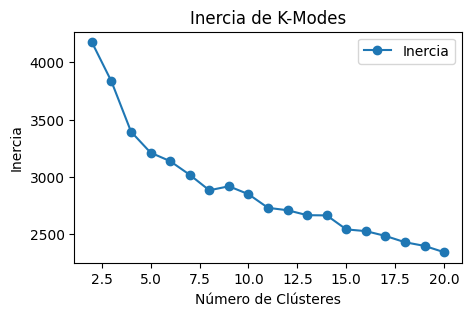

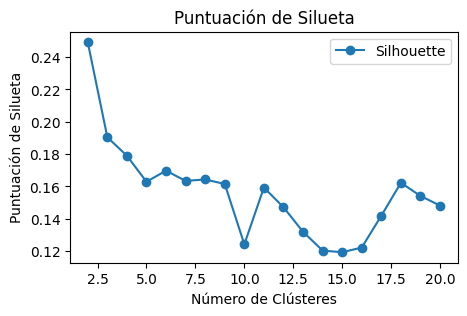

In [12]:
inertia = []
silueta = []

for i in range(2, 21):  # de 2 a 10 clústeres
    modelo = KModes(n_clusters=i, init='Huang', n_init=5, random_state=68)
    modelo.fit(df_clean)

    labels = modelo.labels_
    score = silhouette_score(df_clean, labels, metric='hamming')
    silueta.append(score)

    inertia.append(modelo.cost_)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), inertia, marker='o', label="Inercia")
plt.title('Inercia de K-Modes')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.legend()

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), silueta, marker='o', label="Silhouette")
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')
plt.legend()

plt.show()

Observando el gráfico de inercia, el codo parece está alrededor de 5, en el gráfico de silueta notamos que el mejor K = 2, pero no es necesariamente aceptable en este contexto.

PC1: 0.1845 (18.45%)
PC2: 0.1092 (10.92%)


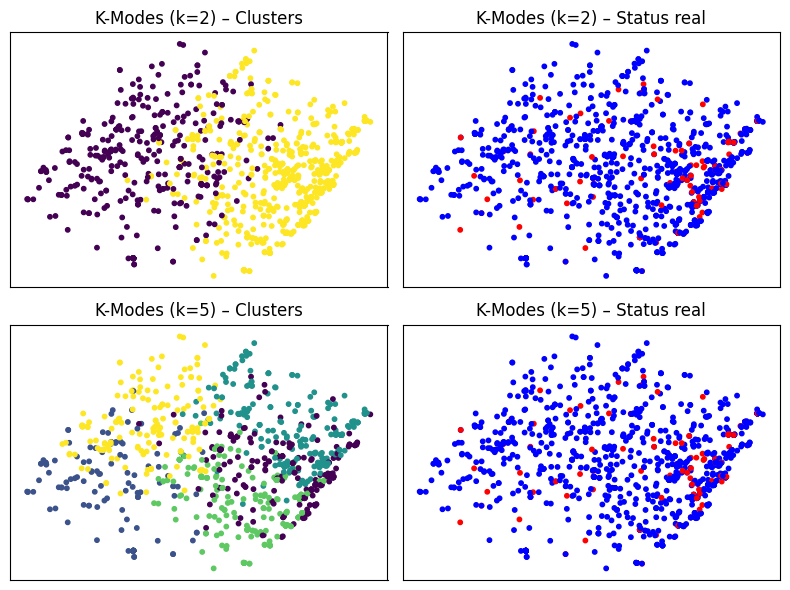

In [19]:
pca = PCA(n_components=2, random_state=68)
X_2d = pca.fit_transform(df_clean)

for i, v in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {v:.4f} ({v*100:.2f}%)")

y_colors = np.where(y_status == 'Negativa', 'blue', 'red')


ks = [2, 5]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for row, k in enumerate(ks):
    modelo = KModes(n_clusters=k, init='Huang', n_init=5, random_state=68)
    labels = modelo.fit_predict(df_clean)

    axes[row, 0].scatter(
        X_2d[:, 0], X_2d[:, 1],
        c=labels, s=10
    )
    axes[row, 0].set_title(f'K-Modes (k={k}) – Clusters')

    axes[row, 1].scatter(
        X_2d[:, 0], X_2d[:, 1],
        c=y_colors, s=10
    )
    axes[row, 1].set_title(f'K-Modes (k={k}) – Status real')

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Clustering Jerárquico con la distancia de Jaccard

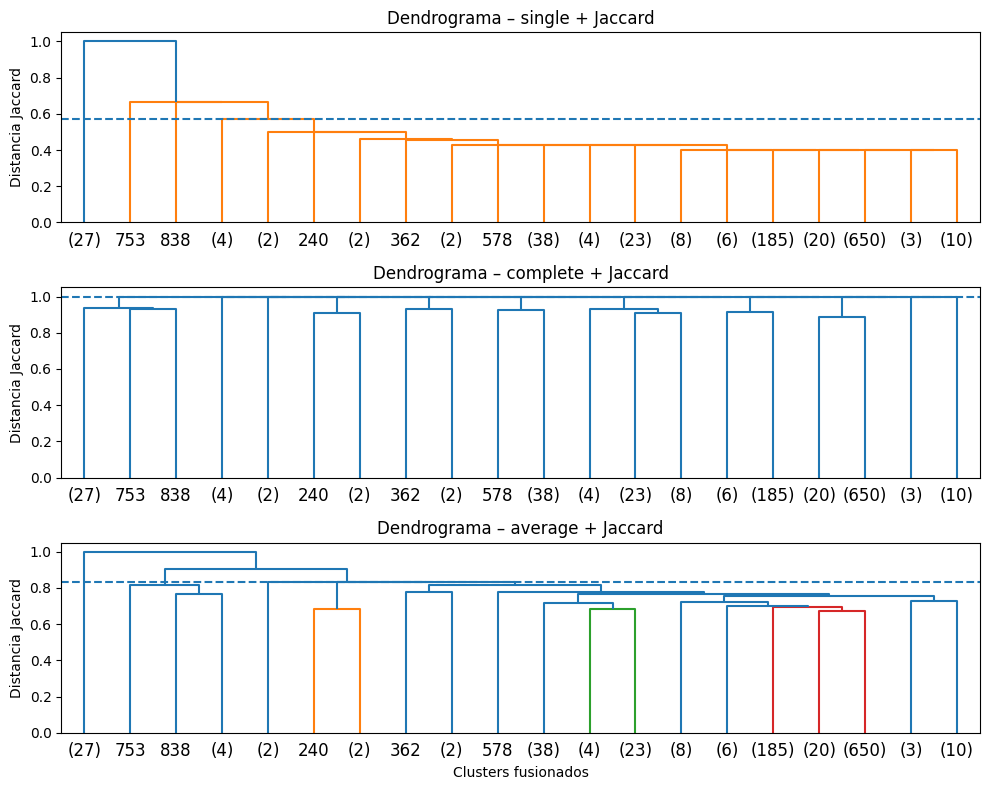

In [38]:
methods = ['single', 'complete', 'average']
k = 5

dist_jaccard = pdist(df_clean, metric='jaccard')

fig, axes = plt.subplots(len(methods), 1, figsize=(10, 8), sharex=True)

for i, method in enumerate(methods):
    Z = linkage(dist_jaccard, method=method)

    # altura de corte para k clusters
    dist_corte = Z[-(k-1), 2]

    dendrogram(
        Z,
        ax=axes[i],
        truncate_mode='lastp',
        p=20,
        show_leaf_counts=True
    )

    axes[i].axhline(y=dist_corte, linestyle='--')
    axes[i].set_title(f'Dendrograma – {method} + Jaccard')
    axes[i].set_ylabel('Distancia Jaccard')

axes[-1].set_xlabel('Clusters fusionados')
plt.tight_layout()
plt.show()

In [39]:

resultados = []

for method in methods:
    Z = linkage(dist_jaccard, method=method)
    clusters = fcluster(Z, t=k, criterion='maxclust')

    df_res = pd.DataFrame({
        'cluster': clusters,
        'infectado': y_status
    })

    tabla = (
        df_res
        .groupby('cluster')['infectado']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )

    tabla['method'] = method
    resultados.append(tabla.reset_index())

df_resultados = pd.concat(resultados)
print(df_resultados)

infectado  cluster  Negativa  Positiva    method
0                1  0.962963  0.037037    single
1                2  0.897810  0.102190    single
2                3  0.000000  1.000000    single
3                4  1.000000  0.000000    single
4                5  1.000000  0.000000    single
0                1  0.898888  0.101112  complete
0                1  0.962963  0.037037   average
1                2  0.833333  0.166667   average
2                3  1.000000  0.000000   average
3                4  0.666667  0.333333   average
4                5  0.898002  0.101998   average
